# 영화 Plot을 통한 LDA 모델링

## 패키지 불러오기

In [2]:
import requests
import json
import pprint
from pandas import Series, DataFrame
import pandas as pd

## omdb의 json을 통해 영화 정보 데이터프레임 만들기 test

In [109]:
url0 = 'http://www.omdbapi.com/?i=tt4960070&plot=full&r=json' 
response = requests.get(url0)
text = response.text
text2 = json.loads(text)
#pprint.pprint(text2)
df = DataFrame(text2, index=[0])
df
#초기 데이터프레임(첫행) 만들어놓기


,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
0,Sean Mitchell,N/A,USA,Stephen Mitchell,Comedy,English,N/A,It's the Kid's Word is a comedy about a child ...,http://ia.media-imdb.com/images/M/MV5BNDg5Mzkx...,N/A,01 Jun 2000,True,N/A,It's the Kid's World,movie,Stephen Mitchell,2000,tt4960070,N/A,N/A


## 사용자생성함수 만들기(json url -> 데이터프레임)

In [110]:
def toDf(url):
	###json url을 데이터프레임으로 변환하기
    response = requests.get(url)
    text = response.text
    text2 = json.loads(text)
    global tempDf
    tempDf = DataFrame(text2, index=[0])

## 영화 코드(tt + 7digits) 쭉 돌려서 영화 정보 데이터프레임 만들기(예시)

In [111]:
#실제 LDA모델링에 사용한 데이터는 현재 range보다 훨씬 넒은 범위를 포괄함 
#컴퓨팅 문제로 한번에 많은양의 영화 코드를 돌릴 수 없기 때문에 jupyter notebook에서는 예시 코드만 제시하고 
#모델에는 여러 번 로딩을 시도하여 수집한 최종 데이터를 활용함 

for code in range(4960100, 4960161):
    url1 = 'http://www.omdbapi.com/'
    url2 = '?i=tt{:07d}'.format(code) #자리수 고려
    url3 = '&plot=full&r=json'
    url = url1 + url2 + url3
    toDf(url)
    if (text2 == {'Error': 'Error getting data.', 'Response': 'False'}) == False:
        df = pd.concat([df, tempDf]).reset_index(drop=True)

In [112]:
df

,Actors,Awards,Country,Director,Episode,Error,Genre,Language,Metascore,Plot,...,Runtime,Season,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes,seriesID
0,Sean Mitchell,N/A,USA,Stephen Mitchell,NaN,NaN,Comedy,English,N/A,It's the Kid's Word is a comedy about a child ...,...,N/A,NaN,It's the Kid's World,movie,Stephen Mitchell,2000,tt4960070,N/A,N/A,NaN
1,NaN,NaN,NaN,NaN,NaN,Error getting data.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,Error getting data.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N/A,N/A,"USA, Haiti",Jonathan Moyer,NaN,NaN,"Documentary, Music",English,N/A,A young man survives the Haiti earthquake to h...,...,64 min,NaN,Haiti 10,movie,N/A,2015,tt4960102,N/A,N/A,NaN
4,NaN,NaN,NaN,NaN,NaN,Error getting data.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,Error getting data.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,Error getting data.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Cornelius Obonya, Lojze Wieser",N/A,N/A,Florian Gebauer,1,NaN,Documentary,N/A,N/A,N/A,...,30 min,2,Die Lausitz,episode,Lojze Wieser,2014,tt4960106,N/A,N/A,tt3343342
8,NaN,NaN,NaN,NaN,NaN,Error getting data.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,N/A,N/A,USA,N/A,NaN,NaN,"Short, Mystery",English,N/A,Kaitlin Davis is invited to a social event tha...,...,20 min,NaN,The Invitation,movie,N/A,2015,tt4960108,N/A,N/A,NaN


# 영화 정보 데이터프레임 전처리(예시)

In [113]:
df.columns[[4, 5, 13, 15, 17]]

Index(['Episode', 'Error', 'Response', 'Season', 'Type'], dtype='object')

In [114]:
df = df[df.Error != 'Error getting data.'] #data를 얻어오지 못한 에러 행 제거
df = df[df.Type == 'movie'] #Type이 movie인 경우만 필터링(에피소드, 시리즈 삭제)
df = df.drop(df.columns[[4, 5, 13, 15, 17]], axis=1) #불필요한 칼럼 삭제

In [115]:
runtime = [] # 74 min 과 같은 형식으로 되어있는 runtime을 int만 남도록 처리
for item in df.Runtime:
    if item.endswith('min'):
        runtime.append(item[:-4])
    else: 
        runtime.append(item)
df.Runtime = runtime

In [116]:
df = df[df.Runtime != 'N/A']
df.Runtime = pd.to_numeric(df.Runtime) 
df = df[df.Runtime > 60] #상영시간이 60분 초과인 영화만 필터링

In [117]:
#Adventure, Biography, Drama

#Genre
df = pd.concat([df, df["Genre"].str.split(', ', expand=True)], axis=1)
#ancsv = pd.concat([dfcleancsv['KEYS'], dfcleancsv[1].str.split(', ', expand=True)], axis=1)
df = df.rename(columns = {0:'Genre1', 1:'Genre2', 2:'Genre3'})

In [119]:
df = df[df.Title != '#DUPE#'] #실제로 존재하지 않는 영화 제거 

In [127]:
df = df.drop(df.columns[[18]], axis=1)

In [129]:
df

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,...,Runtime,Title,Writer,Year,imdbID,imdbRating,imdbVotes,Genre1,Genre2,Genre3
3,N/A,N/A,"USA, Haiti",Jonathan Moyer,"Documentary, Music",English,N/A,A young man survives the Haiti earthquake to h...,N/A,N/A,...,64,Haiti 10,N/A,2015,tt4960102,N/A,N/A,Documentary,Music,None
27,"Jodi Mattinson, Torri Ti Mattinson",N/A,USA,Kourtney Ragland,"Documentary, Biography, Drama",English,N/A,"Sexy,sharp and a straight up hustle Jody'Storm...",N/A,N/A,...,74,A Madam's Heaven and Hell,"Jodi Mattinson, Frank Williams",2015,tt4960126,N/A,N/A,Documentary,Biography,Drama


In [130]:
df.to_csv("python_project.csv", sep=',') #예시 저장

# omdb 데이터로 LDA 만들기

## 패키지 불러오기

In [137]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
%matplotlib inline

## omdb에서 json으로 수집해놓은 영화 데이터 불러오기(예시와 같은 방법으로 수집한 데이터)

In [138]:
Plot = pd.read_excel("./PLOTDATA/Data_tot_prep_prep.xlsx")["Plot"] 
Corpus = [plot for plot in Plot]
print("%d Documents in Corpus" %len(Corpus))

2792 Documents in Corpus


##  Term - Document Matrix 만들기

In [139]:
from nltk import wordpunct_tokenize,word_tokenize,pos_tag
from nltk.stem import WordNetLemmatizer, SnowballStemmer

## 사람 이름 데이터 불러오기

In [140]:
#사람 이름 파일은 Kaggle의 미국 영어 이름 데이터('NationalNames') 사용(남/여 이름 빈도 각각 상위 600개)
#영화 Plot에 사람 이름이 많이 등장하기 때문에 이를 Stopwords에 추가하여 제외하기 위함
Name_M = pd.read_csv("Name_m.csv")["Name"]
Name_m = [item.lower() for item in list(Name_M)]
Name_F = pd.read_csv("Name_f.csv")["Name"]
Name_f = [item.lower() for item in list(Name_F)]

## Tokenizer 만들고 새로운 Stopwords 추가하기

In [141]:
from sklearn.feature_extraction import text 
punctuations = [ '(', ')','[',']', "'", "`", '``', "''", ";", ":", ".",".",'-',"!", "'s","...", ",", '–', "n't","?"]
new_stop_words = punctuations + Name_m + Name_f
Stop_words = text.ENGLISH_STOP_WORDS.union(new_stop_words)

def my_tokenizer(words):
    tokens = word_tokenize(words)
    Stemmer = SnowballStemmer("english")
    return [Stemmer.stem(token) for token in tokens if token.lower() not in Stop_words]

In [142]:
Stemer = SnowballStemmer("english")

## 빈도 출력

In [143]:
Doc = [my_tokenizer(plot) for plot in Plot]
freqdist = nltk.FreqDist( sum(Doc,[]) )

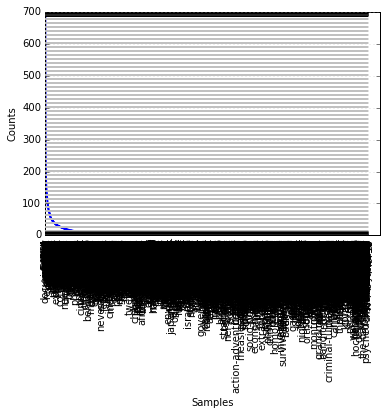

In [144]:
freqdist.plot() 

In [145]:
#단어 별 빈도 파일 저장
import csv
f=open('word_freq_project.csv','w')
for k,v in  freqdist.most_common():
    f.write( "{}, {}\n".format(k,v))
f.flush()
f.close()

## TDM 

In [146]:
#min_df, max_df 적절히 설정
vectorizer = CountVectorizer( 
    ngram_range=(1,2),
    tokenizer =my_tokenizer,
    stop_words=Stop_words,
    min_df=3,
    max_df=0.13
)

In [147]:
tdm = vectorizer.fit_transform(Corpus)
Feature_name = vectorizer.get_feature_names()

In [148]:
len(Feature_name)

5150

In [149]:
tdm

<2792x5150 sparse matrix of type '<class 'numpy.int64'>'
	with 64691 stored elements in Compressed Sparse Row format>

In [150]:
Feature_name_omdb = vectorizer.get_feature_names()
len(Feature_name_omdb)


5150

In [151]:
with open('Feature_name_omdb.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(Feature_name_omdb))

## gensim 포맷으로 바꾸기

In [152]:
from gensim.matutils import Sparse2Corpus

In [153]:
corpus = Sparse2Corpus(tdm.T)

## Latent Dirichlet Allocation

In [154]:
from gensim.models.ldamodel import LdaModel

In [164]:
lda = LdaModel(corpus=corpus, num_topics=50, id2word=dict(enumerate(Feature_name_omdb)))

## Topic 보기

In [165]:
lda.show_topic(0)

[('citi', 0.011433837121008244),
 ('professor', 0.010750665836006892),
 ('new', 0.010097867697858833),
 ('class', 0.0082293079489173318),
 ('exil', 0.0077922194495143966),
 ('gender', 0.0075279848087548796),
 ('stone', 0.0073519619523878237),
 ('day', 0.0071467683466128612),
 ('teenag', 0.0070328500943907689),
 ('real', 0.0068236323249247421)]

In [166]:
lda.show_topic(1)

[('famili', 0.012836407337278628),
 ('oldest', 0.0097326141857188731),
 ('littl', 0.0085236314170200091),
 ('experi', 0.0081226644536981259),
 ('thing', 0.0077025599258359473),
 ('dream come', 0.0075680217033653871),
 ('love', 0.0071250325244668188),
 ('young', 0.0070096021703908145),
 ('liber', 0.006540932285200308),
 ('man', 0.0061704970031032222)]

In [167]:
lda.show_topic(2)

[('mafia', 0.013431466204639692),
 ('russian', 0.013088848285430549),
 ('power', 0.010732354501940718),
 ('human', 0.010105315549756173),
 ('democraci', 0.0097305485273095921),
 ('boat', 0.0095470454785838259),
 ('travel', 0.0086771593670589859),
 ('time', 0.0082663106367062353),
 ('did', 0.0081201103368852175),
 ('prank', 0.0075371497099209032)]

In [168]:
lda.show_topic(3)

[('christma', 0.019175448882918871),
 ('friend', 0.018042803454734038),
 ('tri', 0.013124291007701117),
 ('stori love', 0.0076590822738738388),
 ('offer', 0.0075678085602116051),
 ('woman', 0.0067572935909002482),
 ('peopl', 0.0067422094970850241),
 ('help', 0.0066320498568131717),
 ('small', 0.0064585568138318221),
 ('time', 0.0063780622147545729)]

In [169]:
lda.show_topic(4)

[('famili', 0.0159212254339419),
 ('polit', 0.012817013634303926),
 ('present', 0.012097008781147786),
 ('town', 0.011459929026185376),
 ('free', 0.0092329034827710096),
 ('time', 0.0088876389026618097),
 ('boy', 0.0081162713921210244),
 ('month', 0.0079585141158877402),
 ('follow', 0.0078198717202397645),
 ('home', 0.0076574330952512409)]

In [170]:
lda.show_topic(5)

[('decid', 0.010606853959637178),
 ('make', 0.01057167127113591),
 ('definit', 0.008738914637266771),
 ('look', 0.0084375842244267807),
 ('soviet', 0.0084032954491306839),
 ('time', 0.0074284589725055004),
 ('parti', 0.0069323860418208094),
 ('wright', 0.0068843283772485392),
 ('love', 0.0067290591939346825),
 ('peopl', 0.0062211325411789635)]

In [171]:
lda.show_topic(6)

[('music', 0.015116752432067672),
 ('time', 0.0083942481124537824),
 ('documentari', 0.0079783905104194221),
 ('year', 0.0075768390443579619),
 ('young', 0.007442489565035796),
 ('filmmak', 0.0070689053579968165),
 ('past', 0.0066944695857828317),
 ('aliv', 0.0063525762989041484),
 ('fiction', 0.0060583416884793257),
 ('kill', 0.0059932742482911583)]

## LDA 모델 저장하기

In [172]:
lda.save('LDA_omdb.lda')

## LDA 모델 불러오기

In [173]:
lda = LdaModel.load('LDA_omdb.lda')

In [174]:
tdm

<2792x5150 sparse matrix of type '<class 'numpy.int64'>'
	with 64691 stored elements in Compressed Sparse Row format>

# 각 영화의 제 1순위 토픽 찾기

In [177]:
from operator import itemgetter

topic_num = []
for k in range(0, 2792):
    doc = [(i, tdm[k, i]) for i in range(5150)]
    num = sorted(lda.get_document_topics(doc), key=itemgetter(1), reverse=True)[0][0]
    topic_num.append(num)
    
plot_num = list(range(0, 2792, 1))

In [178]:
topic_df = DataFrame({'Plot_num': plot_num, 'Topic_num': topic_num})

In [179]:
topic_df.to_csv("omdb_topic_df.csv", sep=',') 

## omdb 데이터와 1순위 토픽 칼럼 합치기

In [182]:
omdb = pd.read_excel("./PLOTDATA/Data_tot_prep_prep.xlsx")

In [184]:
num = list(range(0, 2792, 1))
omdb['num'] = num
#df1['e'] = p.Series(np.random.randn(sLength), index=df1.index)

In [185]:
omdb

,Actors,Awards,Award_nomi,Award_win,Awards_sum,Country,Director,Genre,Genre1,Genre2,...,Metascore,Plot,Poster,Rated,Released,Runtime,Title,Writer,Year,num
0,Melvin Rice,NaN,NaN,NaN,0,USA,NaN,"Horror, Thriller",Horror,Thriller,...,NaN,Three teenagers who gets invited by an upgrade...,http://ia.media-imdb.com/images/M/MV5BMDk2NTkz...,NaN,NaT,190,The Shadows in the Dark,"Kelso Quigley, Melvin Rice",2019,0
1,Ny'Aira Collins,NaN,NaN,NaN,0,USA,Larry Hicks,Drama,Drama,NaN,...,NaN,Young Terrance Glover finds himself torn betwe...,NaN,NaN,2018-11-01,135,The Bishop's Son,"Elijah Doyle, Larry Hicks",2018,1
2,NaN,NaN,NaN,NaN,0,France,Anatoly K. Ivanov,"Adventure, Biography, Drama",Adventure,Biography,...,NaN,"A philosophical adventure biopic, 08.20 is a s...",http://ia.media-imdb.com/images/M/MV5BY2QxM2Y5...,NaN,2018-01-18,98,8.2,Anatoly K. Ivanov,2018,2
3,NaN,NaN,NaN,NaN,0,USA,Akbar de Wighar,"Animation, Action",Animation,Action,...,NaN,Set in The City where Jonathan Kersky as a Stu...,http://ia.media-imdb.com/images/M/MV5BOGZmMGY0...,NaN,NaT,90,Round,Akbar de Wighar (story),2018,3
4,John Nicholas,NaN,NaN,NaN,0,USA,Dami Onifade,Drama,Drama,NaN,...,NaN,Tariq completes a medical study where local go...,NaN,NaN,2018-08-07,95,The Successes of Dr. Oduno,"Raghav Murali (screenplay), Dami Onifade (scre...",2018,4
5,Bradley Merchant,NaN,NaN,NaN,0,UK,Marius Sørvik,Drama,Drama,NaN,...,NaN,Teenager Kyle McAllister goes back to his home...,NaN,NaN,2018-02-10,110,The Framlingham Incident,Jim Mack,2018,5
6,Marcus McMahon,NaN,NaN,NaN,0,UK,Paul Harrison,Horror,Horror,NaN,...,NaN,In the cold North a medical student embarks on...,NaN,NaN,NaT,120,From the Corner of My Eye,"Paul Harrison, Marcus McMahon",2018,6
7,"Caroline Dhavernas, Elizabeth Marvel, Charlie ...",NaN,NaN,NaN,0,USA,Adam Keleman,Drama,Drama,NaN,...,NaN,"Sherry, a self-destructive makeup saleswoman, ...",NaN,NaN,NaT,86,Easy Living,Adam Keleman,2017,7
8,NaN,NaN,NaN,NaN,0,USA,Jeff Dull,Drama,Drama,NaN,...,NaN,A woman who prizes control sacrifices all that...,NaN,NaN,2017-08-01,90,Redemption Way,Brad Podowski,2017,8
9,Scott Rivers,NaN,NaN,NaN,0,UK,NaN,"Comedy, Sci-Fi",Comedy,Sci-Fi,...,NaN,Sasha Montana Was Once A Princess To An Irish ...,NaN,NaN,2017-09-10,95,Sasha Montana,Scott Rivers,2017,9


In [186]:
Final_data = pd.merge(omdb, topic_df, left_on='num', right_on='Plot_num')
Final_data.to_csv("omdb_topic.csv", sep=',')

In [187]:
Genre_cross_Topic = pd.crosstab(Final_data.Genre1, Final_data.Topic_num)
Genre_cross_Topic.to_csv("Genre_cross_omdbLDA_Topic.csv", sep=',') 

## 가설 H1

In [208]:
Title_topic = Final_data[[21,26]]
Title_topic = Title_topic.sort(['Topic_num'])
Title_topic #H2 이것도 사실 가설이 맞는지 알아보기 힘듦

C:\Users\eudem\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Title,Topic_num
1520,Jambareeqi Reviews: The Morteus Saga,0
2704,Just Like Me,0
2036,An Eye for an Eye,0
1654,Murder in Mexico,0
370,LEGO Friends: Girlz 4 Life,0
2718,Destination Unknown,0
97,Was hat uns bloß so ruiniert,0
2499,"Out of Mind, Out of Sight",0
1783,Kapatiran,0
2562,Plastic Crime,0


In [209]:
lda.show_topic(0)

[('citi', 0.011433837121008244),
 ('professor', 0.010750665836006892),
 ('new', 0.010097867697858833),
 ('class', 0.0082293079489173318),
 ('exil', 0.0077922194495143966),
 ('gender', 0.0075279848087548796),
 ('stone', 0.0073519619523878237),
 ('day', 0.0071467683466128612),
 ('teenag', 0.0070328500943907689),
 ('real', 0.0068236323249247421)]

In [210]:
lda.show_topic(49)

[('bond', 0.012391983046800172),
 ('new', 0.0098566558277958776),
 ('man', 0.0096682919494319852),
 ('music', 0.0095643018023897474),
 ('turn', 0.0089332298022456475),
 ('love', 0.0083781406752313353),
 ('chang', 0.0061072991043409639),
 ('way', 0.0056107964426994825),
 ('like', 0.0055702858653997591),
 ('share', 0.0054468819504502088)]

## 가설 H2

In [188]:
Genre_cross_Topic #H2 확인을 위한 cross table. 가설이 기각인 것으로 보임.

Topic_num,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Genre1,,,,,,,,,,,,,,,,,,,,,
Action,1,1,3,2,2,1,6,4,0,3,...,4,7,1,2,1,1,2,6,1,4
Adult,0,0,0,0,0,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
Adventure,2,0,1,1,1,1,0,1,0,0,...,0,0,0,2,2,0,2,1,0,4
Animation,2,2,0,0,1,1,2,1,0,0,...,0,2,0,0,0,1,0,2,0,1
Biography,3,0,0,0,0,0,1,0,1,1,...,0,1,0,0,0,0,1,1,1,0
Comedy,10,10,4,9,5,6,6,9,9,8,...,8,16,6,5,6,11,4,13,4,7
Crime,4,1,2,2,1,1,3,2,1,1,...,1,0,2,1,2,2,1,1,0,1
Documentary,14,10,22,19,10,23,21,22,9,19,...,20,25,22,24,18,16,9,15,13,32
Drama,13,8,11,8,10,12,17,13,8,7,...,23,15,8,18,5,15,12,10,6,11
